In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np

In [2]:
seed = [85387, 167102, 578561, 979676]
series_seed = [12245, 23928, 5905072]
simulations = ['first', 'last']
stimulus = [0, 1, 4]
stimulus_id = [4918, 180160, 227728, 294899, 366797, 408166, 599593, 983115]
# seed = [85387, 167102]
# series_seed = [12245, 23928]
# simulations = ['first', 'last']
# stimulus = [0, 1]
# stimulus_id = [4918, 180160]

n_times = 6
n_neurons = 1000

index = pd.MultiIndex.from_product(
    [seed, series_seed, simulations, stimulus, stimulus_id],
    names=['seed', 'series_seed', 'simulations', 'stimulus', 'stimulus_id']
)

np.random.seed(0)
values = [np.random.rand(n_times * n_neurons).round(1).reshape(n_times, n_neurons) for i in range(len(index))]
raw = pd.Series(values, index=index)
display(raw)

seed    series_seed  simulations  stimulus  stimulus_id
85387   12245        first        0         4918           [[0.5, 0.7, 0.6, 0.5, 0.4, 0.6, 0.4, 0.9, 1.0,...
                                            180160         [[0.4, 0.4, 0.7, 0.6, 0.1, 0.2, 0.1, 0.0, 0.8,...
                                            227728         [[0.6, 0.8, 0.4, 0.5, 0.1, 0.3, 0.9, 0.9, 0.6,...
                                            294899         [[0.8, 0.9, 0.4, 0.3, 0.5, 0.9, 0.1, 0.6, 0.3,...
                                            366797         [[0.2, 0.0, 0.2, 0.5, 0.3, 0.6, 0.9, 0.7, 0.2,...
                                                                                 ...                        
979676  5905072      last         4         294899         [[1.0, 0.9, 0.9, 0.2, 0.3, 0.7, 0.4, 0.1, 0.6,...
                                            366797         [[0.5, 0.8, 0.6, 0.8, 0.1, 0.6, 0.8, 0.6, 0.8,...
                                            408166         [[0.1, 0.2, 0

In [3]:
for name, labels in zip(raw.index.names, raw.index.levels):
    print("{}: {}".format(name, list(labels)))

seed: [85387, 167102, 578561, 979676]
series_seed: [12245, 23928, 5905072]
simulations: ['first', 'last']
stimulus: [0, 1, 4]
stimulus_id: [4918, 180160, 227728, 294899, 366797, 408166, 599593, 983115]


In [4]:
tmp = raw.xs(level="stimulus", key=1, axis="index", drop_level=True)
for name, labels in zip(tmp.index.names, tmp.index.levels):
    print("{}: {}".format(name, list(labels)))

seed: [85387, 167102, 578561, 979676]
series_seed: [12245, 23928, 5905072]
simulations: ['first', 'last']
stimulus_id: [4918, 180160, 227728, 294899, 366797, 408166, 599593, 983115]


In [5]:
raw = raw.droplevel(["series_seed", "stimulus"], axis="index")
display(raw)

seed    simulations  stimulus_id
85387   first        4918           [[0.5, 0.7, 0.6, 0.5, 0.4, 0.6, 0.4, 0.9, 1.0,...
                     180160         [[0.4, 0.4, 0.7, 0.6, 0.1, 0.2, 0.1, 0.0, 0.8,...
                     227728         [[0.6, 0.8, 0.4, 0.5, 0.1, 0.3, 0.9, 0.9, 0.6,...
                     294899         [[0.8, 0.9, 0.4, 0.3, 0.5, 0.9, 0.1, 0.6, 0.3,...
                     366797         [[0.2, 0.0, 0.2, 0.5, 0.3, 0.6, 0.9, 0.7, 0.2,...
                                                          ...                        
979676  last         294899         [[1.0, 0.9, 0.9, 0.2, 0.3, 0.7, 0.4, 0.1, 0.6,...
                     366797         [[0.5, 0.8, 0.6, 0.8, 0.1, 0.6, 0.8, 0.6, 0.8,...
                     408166         [[0.1, 0.2, 0.4, 0.5, 0.2, 1.0, 0.3, 0.9, 0.3,...
                     599593         [[0.1, 0.6, 0.6, 0.8, 0.6, 0.0, 0.9, 0.4, 0.7,...
                     983115         [[0.3, 0.5, 0.2, 0.6, 0.3, 0.5, 0.4, 0.4, 0.2,...
Length: 576, dtype: o

In [6]:
raw.iloc[0].shape

(6, 1000)

In [7]:
indices = range(200, 300)

def split_into_neurons(x):
    return pd.Series(
        (i for i in x[:, indices].transpose()),
        index=pd.Index(indices, name="neuron_index"),
    )

raw = raw.apply(split_into_neurons).stack()
raw_unpooled = raw

In [8]:
display(raw)
display(raw.iloc[0].shape)

seed    simulations  stimulus_id  neuron_index
85387   first        4918         200             [0.3, 0.3, 0.1, 0.9, 0.6, 0.6]
                                  201             [0.7, 0.9, 0.8, 0.4, 0.3, 0.2]
                                  202             [0.4, 0.9, 0.3, 0.8, 0.2, 0.3]
                                  203             [0.2, 0.9, 0.6, 0.7, 0.7, 0.2]
                                  204             [0.0, 0.7, 0.6, 0.3, 0.2, 0.6]
                                                               ...              
979676  last         983115       295             [0.3, 0.8, 0.6, 0.9, 0.3, 0.7]
                                  296             [0.1, 0.2, 0.3, 0.4, 0.6, 0.5]
                                  297             [0.4, 0.8, 0.9, 0.2, 0.4, 0.4]
                                  298             [0.8, 0.4, 0.2, 0.7, 0.1, 0.4]
                                  299             [0.5, 0.2, 0.8, 0.1, 0.9, 0.8]
Length: 57600, dtype: object

(6,)

NEWLY ADDED CELL: Generate a shuffled control

In [9]:
def func(x):
    return pd.Series(
        np.split(np.random.permutation(np.hstack(x)), len(x)),
        index=x.index.get_level_values("stimulus_id"),
    )

raw = raw_unpooled
np.random.seed(0)
# the order of labels is important to get the same result as in ConditionCollection
shuffled_responses = raw.groupby(["simulations", "seed", "neuron_index"]).apply(func)
raw = raw.reorder_levels(["simulations", "seed", "neuron_index", "stimulus_id"])
raw = pd.concat([shuffled_responses, raw], axis='rows', keys=['shuffled', 'data'], names=['control_type'])
raw = raw.reorder_levels(["simulations", "seed", "neuron_index", "control_type", "stimulus_id"])
# sort for comparison
raw = raw.sort_index(kind='stable')



In [10]:
import hashlib
display(hashlib.md5(raw.to_json(orient="records").encode("utf-8")).hexdigest())
display(raw)


'9a846aee90fb59d095e846e25c37eea2'

simulations  seed    neuron_index  control_type  stimulus_id
first        85387   200           data          4918           [0.3, 0.3, 0.1, 0.9, 0.6, 0.6]
                                                 4918           [0.2, 0.7, 0.3, 0.6, 0.2, 0.3]
                                                 4918           [0.3, 0.4, 0.7, 0.2, 0.4, 0.2]
                                                 4918           [0.1, 0.4, 0.6, 0.1, 0.3, 0.0]
                                                 4918           [0.8, 0.2, 0.3, 0.8, 0.5, 0.6]
                                                                             ...              
last         979676  299           shuffled      983115         [1.0, 0.6, 0.1, 0.9, 0.6, 0.1]
                                                 983115         [1.0, 0.7, 0.9, 0.7, 0.9, 0.5]
                                                 983115         [0.1, 0.3, 0.9, 0.7, 0.8, 0.6]
                                                 983115         [0.1, 0.7, 0.8, 0.2,

In [11]:
mean_response = raw.apply(np.mean)

In [12]:
from scipy.stats import entropy

def response_entropy(x):
    return entropy(x, base=2) / np.log2(len(x))

# unstack cannot be used when the index is not unique
response_entropy_stims = (
    mean_response
    .groupby(["control_type", "simulations", "neuron_index", "seed"])
    .agg(response_entropy)
)

In [13]:
display(mean_response)
display(response_entropy_stims)

simulations  seed    neuron_index  control_type  stimulus_id
first        85387   200           data          4918           0.466667
                                                 4918           0.383333
                                                 4918           0.366667
                                                 4918           0.250000
                                                 4918           0.533333
                                                                  ...   
last         979676  299           shuffled      983115         0.550000
                                                 983115         0.783333
                                                 983115         0.566667
                                                 983115         0.600000
                                                 983115         0.500000
Length: 115200, dtype: float64

control_type  simulations  neuron_index  seed  
data          first        200           85387     0.993328
                                         167102    0.992135
                                         578561    0.992785
                                         979676    0.992941
                           201           85387     0.993278
                                                     ...   
shuffled      last         298           979676    0.992988
                           299           85387     0.993144
                                         167102    0.993330
                                         578561    0.992819
                                         979676    0.990041
Length: 1600, dtype: float64

In [14]:
def difference_first_last(x):
#     return sum(x.xs(level='simulations', key='first') - x.xs(level='simulations', key='last'))
    levels_to_drop = list(x.index.names)
    levels_to_drop.remove("simulations")
    x = x.droplevel(levels_to_drop)
    return x.loc["first"] - x.loc["last"]

change_in_response_entropy_stims = (
    response_entropy_stims
    .groupby(["neuron_index", "control_type", "seed"])
    .agg(difference_first_last)
)

display(change_in_response_entropy_stims)

neuron_index  control_type  seed  
200           data          85387     0.000154
                            167102   -0.001247
                            578561   -0.000695
                            979676   -0.000981
              shuffled      85387     0.000244
                                        ...   
299           data          979676   -0.000282
              shuffled      85387     0.000134
                            167102    0.000572
                            578561   -0.000511
                            979676    0.004883
Length: 800, dtype: float64

<ErrorbarContainer object of 3 artists>

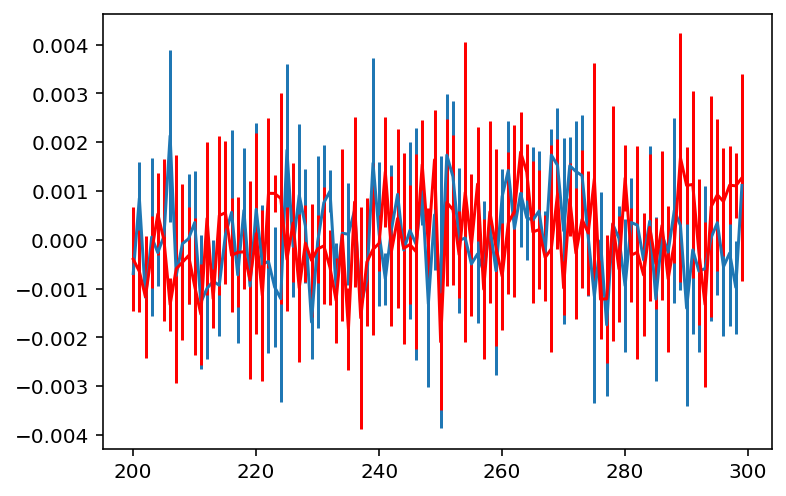

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

change_stims_lst = change_in_response_entropy_stims.groupby(["neuron_index", "control_type"]).apply(np.array)
change_stims_mn = change_stims_lst.apply(np.nanmean)
change_stims_sd = change_stims_lst.apply(np.nanstd)

mn = change_stims_mn.xs(level="control_type", key="data")
sd = change_stims_sd.xs(level="control_type", key="data")
from matplotlib import pyplot as plt
plt.errorbar(mn.index, mn.values, yerr=sd)


# Also plot control
mn = change_stims_mn.xs(level="control_type", key="shuffled")
sd = change_stims_sd.xs(level="control_type", key="shuffled")
from matplotlib import pyplot as plt
plt.errorbar(mn.index, mn.values, yerr=sd, color="red")

In [16]:
display(change_stims_lst)

neuron_index  control_type
200           data            [0.00015417871877332345, -0.001247316234977091...
              shuffled        [0.00024353486038231065, 0.0006735278466255545...
201           data            [0.0008581293616071184, 0.0018550078186947427,...
              shuffled        [0.00020776056625626538, -0.000634653090118786...
202           data            [-0.0009523741859921442, -0.001033924811436382...
                                                    ...                        
297           shuffled        [0.0009878341349017772, 0.000808473802870191, ...
298           data            [-0.0004853989101561984, -0.002617146619616539...
              shuffled        [0.0020127824219509094, 0.0005488216762901121,...
299           data            [0.0031591021889538773, 0.000652424551138231, ...
              shuffled        [0.00013407993584790834, 0.000572003041929281,...
Length: 200, dtype: object

In [17]:
from scipy.stats import ttest_ind

def test_wo_nans(a, b):
    return ttest_ind(a[~np.isnan(a)], b[~np.isnan(b)]).pvalue

tmp1 = change_stims_lst.xs(level="control_type", key="data")
tmp2 = change_stims_lst.xs(level="control_type", key="shuffled")
tmp1.combine(tmp2, func=test_wo_nans)


neuron_index
200    0.683515
201    0.058891
202    0.996378
203    0.779021
204    0.255128
         ...   
295    0.662194
296    0.247226
297    0.204985
298    0.021100
299    0.915846
Length: 100, dtype: float64